In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('./드라마_출연진_종합파일.csv')

In [46]:
df.head(1)

,방송일자,채널명,프로그램시작시간,프로그램종료시간,프로그램명,방송회차명,프로그램장르소분류명,출연진내용,총시청률,평균시청률,장르1,장르2,인터넷반응지수
0,20200101,KBS2,22,222624,99억의여자,17회,미니시리즈,"조여정,김강우,정웅인",4.117441,3.675295,범죄,액션,15.725


In [47]:
# 시각화라이브러리 추가
import matplotlib.pyplot as plt

# 한글처리 라이브러리
from matplotlib import font_manager, rc
# 시스템 OS 확인을 위한 라이브러리
import platform

In [58]:
j1 = df[["장르1","인터넷반응지수","평균시청률"]]
j1

,장르1,인터넷반응지수,평균시청률
0,범죄,15.725000,3.675295
1,범죄,15.725000,3.675295
2,로맨스,11.428000,1.273727
3,미스터리,9.181000,1.651590
4,범죄,15.725000,3.675295
...,...,...,...
2090,로맨스,16.255667,1.075146
2091,청춘,7.117667,0.865532
2092,미스터리,9.141500,1.142675
2093,로맨스,16.255667,1.075146


In [59]:
j2 = df[["장르2","인터넷반응지수","평균시청률"]]
j2

,장르2,인터넷반응지수,평균시청률
0,액션,15.725000,3.675295
1,액션,15.725000,3.675295
2,NaN,11.428000,1.273727
3,추리,9.181000,1.651590
4,액션,15.725000,3.675295
...,...,...,...
2090,NaN,16.255667,1.075146
2091,NaN,7.117667,0.865532
2092,추리,9.141500,1.142675
2093,NaN,16.255667,1.075146


In [60]:
j2.rename(columns = {"장르2":"장르1"},inplace = True )

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [61]:
j2

,장르1,인터넷반응지수,평균시청률
0,액션,15.725000,3.675295
1,액션,15.725000,3.675295
2,NaN,11.428000,1.273727
3,추리,9.181000,1.651590
4,액션,15.725000,3.675295
...,...,...,...
2090,NaN,16.255667,1.075146
2091,NaN,7.117667,0.865532
2092,추리,9.141500,1.142675
2093,NaN,16.255667,1.075146


In [62]:
genre = pd.concat([j1,j2],axis=0)
genre = genre.reset_index(drop=True)
genre

,장르1,인터넷반응지수,평균시청률
0,범죄,15.725000,3.675295
1,범죄,15.725000,3.675295
2,로맨스,11.428000,1.273727
3,미스터리,9.181000,1.651590
4,범죄,15.725000,3.675295
...,...,...,...
4185,NaN,16.255667,1.075146
4186,NaN,7.117667,0.865532
4187,추리,9.141500,1.142675
4188,NaN,16.255667,1.075146


In [63]:
genre.rename(columns = {"장르1":"장르"},inplace = True )

In [64]:
genre

,장르,인터넷반응지수,평균시청률
0,범죄,15.725000,3.675295
1,범죄,15.725000,3.675295
2,로맨스,11.428000,1.273727
3,미스터리,9.181000,1.651590
4,범죄,15.725000,3.675295
...,...,...,...
4185,NaN,16.255667,1.075146
4186,NaN,7.117667,0.865532
4187,추리,9.141500,1.142675
4188,NaN,16.255667,1.075146


In [73]:
genre2 = genre.groupby(["장르"]).mean()

In [74]:
genre2 = genre2.sort_values(by = "인터넷반응지수", ascending = False)

In [79]:
import seaborn as sns
plt.rc("font", family = "malgun gothic")


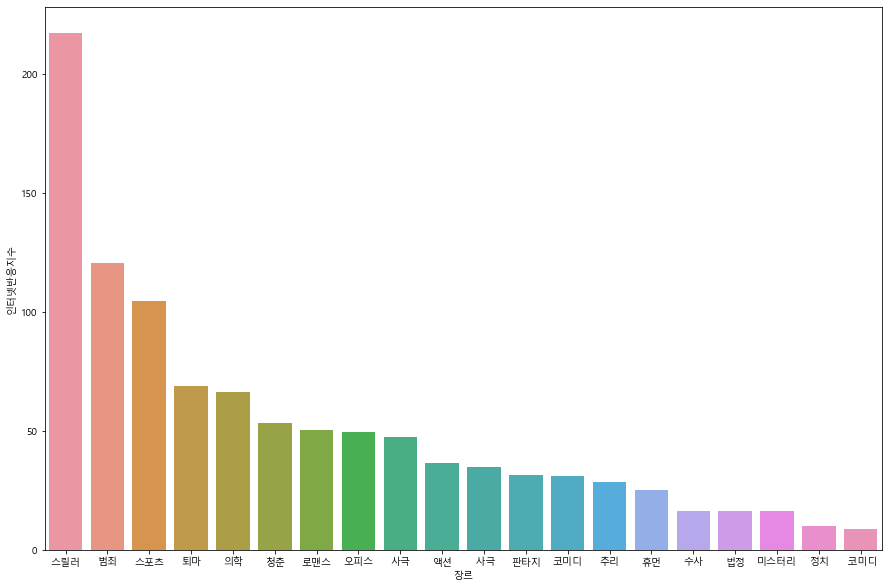

In [83]:
# 장르별 인터넷반응지수
plt.figure(figsize = (15, 10))
sns.barplot(data=genre2, x = "장르", y = "인터넷반응지수")

plt.show()

In [77]:
genre2= genre2.reset_index()

In [ ]:
sns.boxplot(x= "장르", y= "tip", data= tips)

In [86]:
genre2

,장르,인터넷반응지수,평균시청률
0,스릴러,217.316546,8.270312
1,범죄,120.590851,5.657537
2,스포츠,104.509164,4.541925
3,퇴마,68.726380,2.721321
4,의학,66.303144,5.001767
5,청춘,53.201377,0.714680
6,로맨스,50.294140,2.157878
7,오피스,49.610309,1.828547
8,사극,47.418042,3.760171
9,액션,36.711191,2.893089


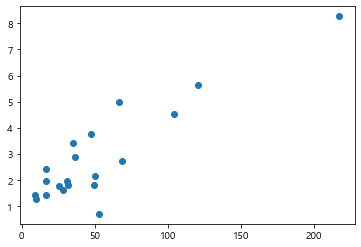

In [88]:
# 장르별 인터넷반응지수와 평균시청률은 양의 관계
plt.scatter(genre2.인터넷반응지수, genre2.평균시청률)

In [89]:
genre3 = genre.groupby(["장르"]).sum()

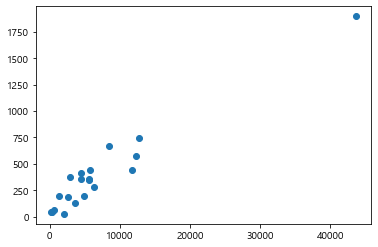

In [92]:
# 장르별 인터넷반응지수와 평균시청률은 양의 관계
plt.scatter(genre3.인터넷반응지수, genre3.평균시청률)

In [91]:
genre3

,인터넷반응지수,평균시청률
장르,,
사극,700.790000,68.602721
코미디,270.412500,43.166276
로맨스,43605.019167,1896.774486
미스터리,4500.303417,409.851188
범죄,12300.266833,577.068797
법정,1330.629917,197.838909
사극,4504.714000,357.216270
수사,2869.112750,377.496166
스릴러,11735.093500,446.596833


In [94]:
df.groupby(["채널명"]).count()

,방송일자,프로그램시작시간,프로그램종료시간,프로그램명,방송회차명,프로그램장르소분류명,출연진내용,총시청률,평균시청률,장르1,장르2,인터넷반응지수
채널명,,,,,,,,,,,,
JTBC,229,229,229,229,229,229,229,229,229,229,157,229
KBS2,405,405,405,405,403,405,405,405,405,405,210,393
MBC,311,311,311,311,311,311,311,311,311,311,169,311
OCN,234,234,234,234,234,234,234,234,234,234,234,218
SBS,404,404,404,404,401,404,404,404,404,404,110,404
tvN,512,512,512,512,511,512,512,512,512,512,269,506


In [121]:
df_1 = df[['채널명','프로그램명']]

In [122]:
df_1=df_1.drop_duplicates().reset_index(drop=True)

In [124]:
df_1.groupby(["채널명"]).count()

,프로그램명
채널명,
JTBC,24
KBS2,21
MBC,19
OCN,12
SBS,17
tvN,44


In [113]:
df2 = df[["채널명","평균시청률"]]

In [114]:
df2=df2.drop_duplicates().reset_index(drop=True)

In [117]:
df2.groupby(["채널명"]).describe()

평균시청률                                                              \
     count      mean       std       min       25%       50%       75%   
채널명                                                                      
JTBC  24.0  1.112175  0.622632  0.277662  0.617317  0.993943  1.515786   
KBS2  21.0  2.043249  0.987095  0.865532  1.244357  1.486434  3.052047   
MBC   19.0  1.793532  0.895049  0.580169  1.266739  1.578058  1.960773   
OCN   12.0  0.915432  0.683754  0.186361  0.419795  0.883414  1.096056   
SBS   17.0  5.618930  3.337625  2.136595  3.243918  4.271302  7.297410   
tvN   44.0  2.809522  1.892837  0.389042  1.564537  2.228856  3.322830   

                 
            max  
채널명              
JTBC   2.503926  
KBS2   3.675295  
MBC    3.974026  
OCN    2.773087  
SBS   14.395862  
tvN    8.415946

<AxesSubplot:xlabel='채널명', ylabel='평균시청률'>

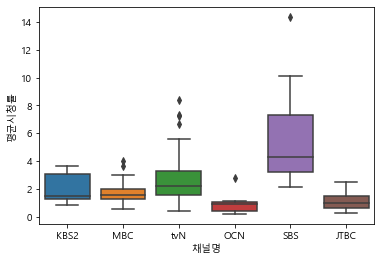

In [118]:
# 채널별 평균시청률 이상치 확인
sns.boxplot(x="채널명", y="평균시청률", data=df2)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


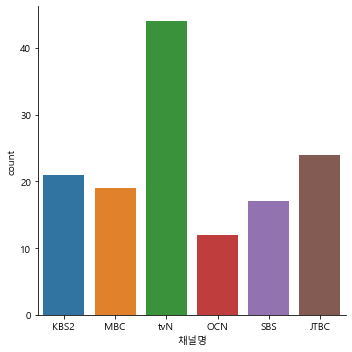

In [125]:
# 채널별 드라마갯수
sns.catplot("채널명", kind = "count", data = df_1)

In [126]:
df4 = df2.groupby(["채널명"]).median()
df4 = df4.reset_index()
df4

<AxesSubplot:xlabel='채널명', ylabel='평균시청률'>

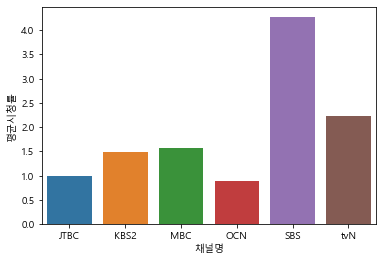

In [140]:
# 채널별 평균시청률(중앙값)
sns.barplot(data=df4, x = "채널명", y = "평균시청률")

In [142]:
df = pd.read_csv('./인터넷반응DB_2020년1월1주_2021년12월5주.csv',encoding = 'cp949', thousands = ',')

In [144]:
df.groupby(["주차"]).mean("가구시청률(%)")

,게시글(건수),댓글(건수),동영상조회(건수),뉴스(건수),동영상(건수),게시글(점유율%),댓글(점유율%),동영상조회(점유율%),뉴스(점유율%),동영상(점유율%),가구시청자수,2049시청자수,가구시청률(%),2049시청률(%)
주차,,,,,,,,,,,,,,
202001,728.500000,3978.714286,5.033030e+05,474.214286,47.571429,1.428571,1.078571,1.050000,1.450000,1.085714,8.647721e+05,275201.285714,4.335714,1.292857
202002,1234.357143,6299.714286,9.929949e+05,733.071429,62.142857,2.035714,1.642857,1.692857,1.771429,1.257143,1.186584e+06,444879.285714,5.942857,2.071429
202003,1554.928571,8768.000000,1.892426e+06,618.571429,59.000000,2.478571,2.150000,2.500000,1.707143,1.185714,1.283271e+06,473054.785714,6.428571,2.207143
202004,1293.357143,7808.642857,1.214168e+06,646.000000,61.000000,2.285714,1.907143,2.150000,1.821429,1.221429,8.941451e+05,330830.785714,4.478571,1.550000
202005,1521.642857,7699.500000,1.463276e+06,632.500000,73.071429,1.928571,1.442857,1.928571,1.764286,1.378571,1.321476e+06,582013.428571,6.614286,2.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202148,435.363636,1942.545455,5.909610e+05,375.545455,39.227273,0.786364,0.595455,0.840909,1.186364,0.695455,4.834177e+05,214773.409091,2.400000,0.986364
202149,661.150000,2933.000000,6.285539e+05,479.700000,48.250000,1.280000,0.965000,0.900000,1.445000,0.815000,5.418598e+05,240468.850000,2.700000,1.105000
202150,912.578947,4781.736842,8.819274e+05,460.157895,52.684211,1.657895,1.363158,1.178947,1.357895,0.952632,7.977062e+05,343519.894737,3.957895,1.589474


In [150]:
df2 = df[["주차","가구시청률(%)"]]

df2 = df2[df2["가구시청률(%)"] != 0]

In [158]:
df3 = df2.groupby("주차").mean()
df3 = df3.reset_index()

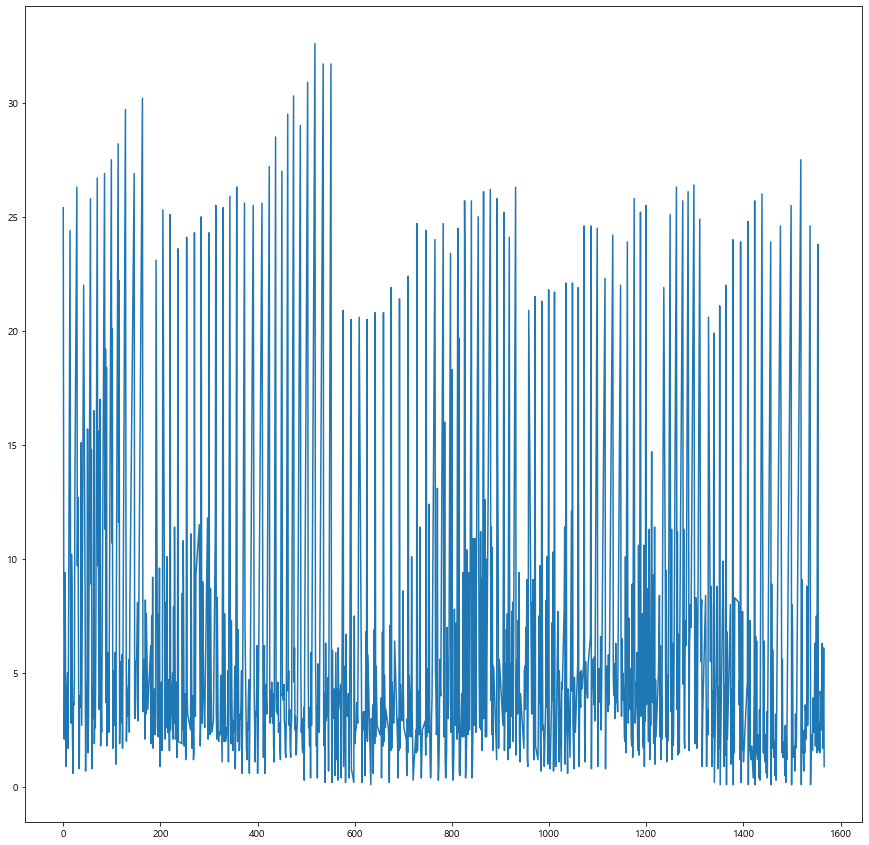

In [174]:
plt.figure(figsize=((15,15)))
plt.plot(df4["index"],df4["가구시청률(%)"])
plt.show()

In [172]:
df4 = df2.reset_index()
df4

,index,주차,가구시청률(%)
0,0,202001,25.4
1,1,202001,9.8
2,2,202001,2.1
3,4,202001,9.4
4,5,202001,2.7
...,...,...,...
1107,1562,202152,6.3
1108,1563,202152,1.7
1109,1564,202152,2.8
1110,1565,202152,6.1
